# Wine Quality Data Preprocessing
Find more information here : https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

<p><b>Status: <span style=color:green;>Completed</span></b></p>

In [1]:
import pandas as pd
import numpy as np

# like in math, these will be the 'X' variables
features = ['Alcohol','Malic_acid','Ash','Alcalinity',
            'Magnesium','Total_phenols','Flavanoids',
            'Nonflavanoid_phenols','Proanthocyanins',
            'Color_intensity','Hue','OD280_OD315',
            'Proline']

# this will be 'Y', or the dependent variable
target = 'quality'

# List all columns
columns = [target] + features

# read dataset and make a table
data = pd.read_csv('../../data/wine.data', names=columns, sep=',', header=None)
data.head()     # preview the first 5 rows

,quality,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##### SEPARATE DATASET

In [2]:
# separate feature and target values
X = data.loc[:, features]
y = data.loc[:, target].copy()

print ('Data Shape:\nX: {}\nY: {}'.format(X.shape, y.shape))

X.head()  # feature data

Data Shape:
X: (178, 13)
Y: (178,)


,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## -- DATA BEFORE BEING PREPROCESSED --

##### SHOW STAT INFORMATION

In [3]:
data.describe()

,quality,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##### VISUALIZE FEATURES VS TARGET

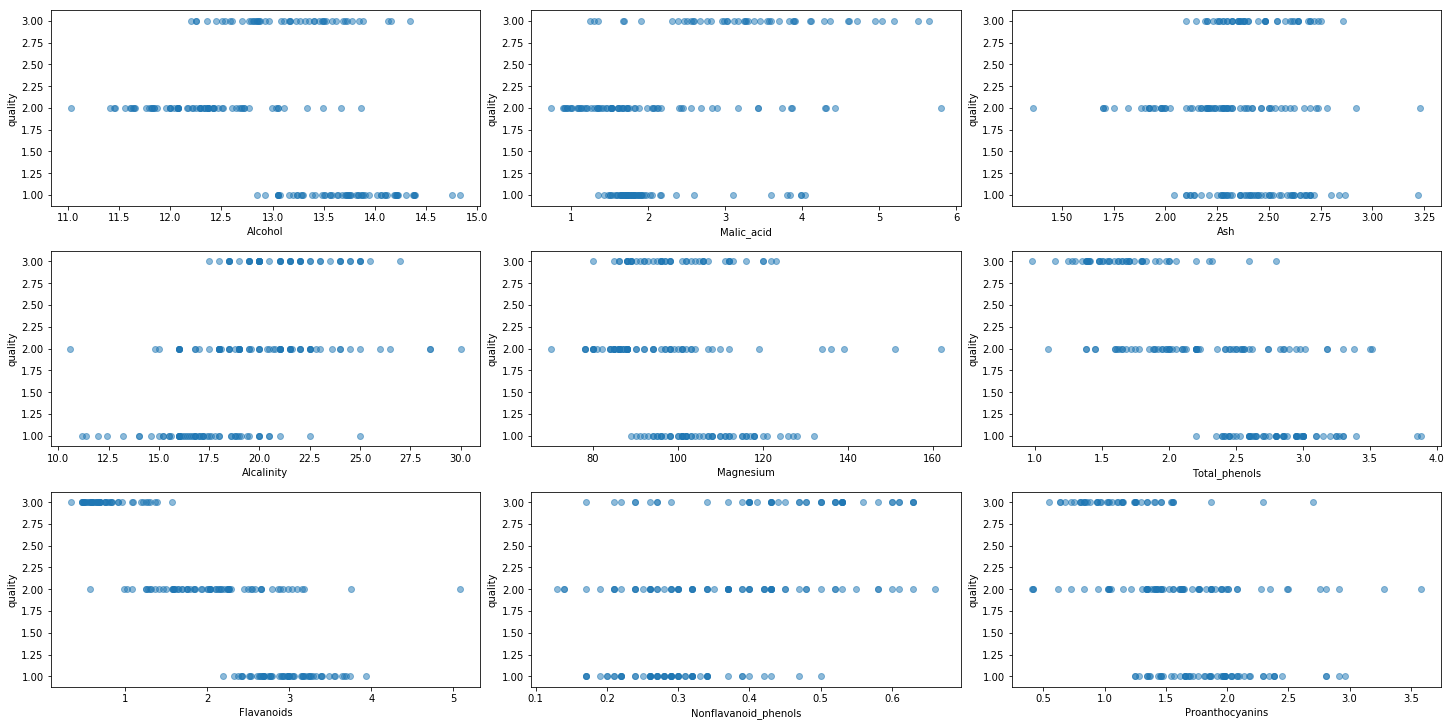

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot with various axes scales
rows = 3 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('quality')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

## -- DATA AFTER BEING PREPROCESSED --

##### PREPROCESS THE DATA

In [5]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# apply standarization to the feature values
scaler = StandardScaler()
scaler = scaler.fit(X)
X[:] = scaler.transform(X)

'''
scaler = MinMaxScaler(feature_range=(0, ))
scaler = m_scaler.fit(X)
X[:] = m_scaler.transform(X)

scaler = Normalizer(feature_range=(0, ))
scaler = m_scaler.fit(X)
X[:] = m_scaler.transform(X)

'''
X.describe()

C:\Users\gerardo_paniagua\.conda\envs\vision\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gerardo_paniagua\.conda\envs\vision\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,3.492836e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


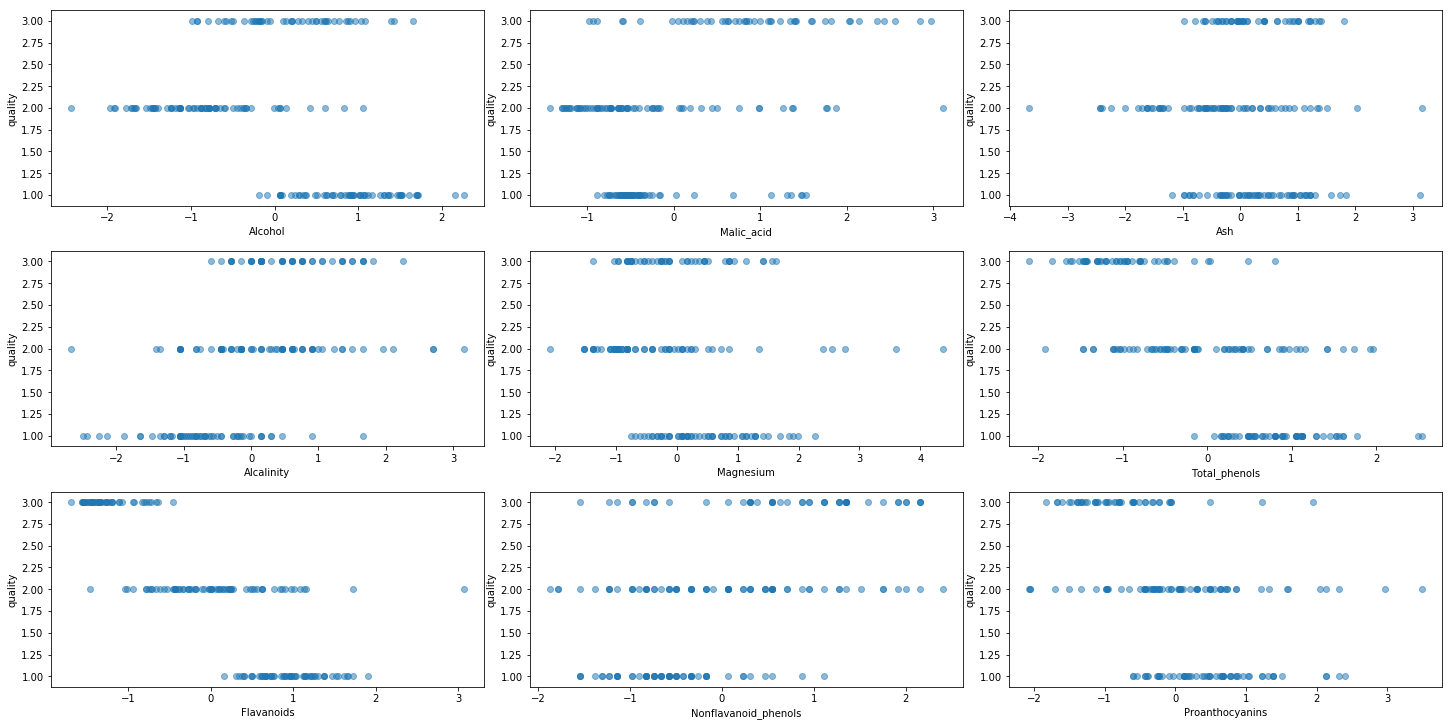

In [6]:
# plot with various axes scales
rows = 3 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('quality')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

##### TRANSFORM THE TARGET VALUES TO ONE-HOT ENCODING

In [7]:
y = pd.get_dummies(y)
y.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


## -- DATA AFTER BEING PREPROCESSED --

##### OUTPUT PREPROCESSED DATASET
This will output the preprocessed feature and target data into CSV files.

In [8]:
X.to_csv('output/preprocessed_data/X.csv', index=False)
y.to_csv('output/preprocessed_data/y.csv', index=False)

print('Preprocessed files created succesfully!')

Preprocessed files created succesfully!


##### OUTPUT SCALER TO PREPROCESS DATA

In [9]:
import pickle

saver = open('output/scaler.pckl', 'wb')
pickle.dump(scaler, saver)
saver.close()

print('Scaler was saved succesfully! please check the output folder')

Scaler was saved succesfully! please check the output folder


##### VERIFY LOADED SCALER

In [10]:
loader = open('output/scaler.pckl', 'rb')
scaler_pickle = pickle.load(loader)
loader.close()

print(scaler_pickle)   # to verify

StandardScaler(copy=True, with_mean=True, with_std=True)
